# Perceptron: Portas Lógicas e Classificação Iris

Este notebook apresenta a implementação do algoritmo Perceptron para resolver problemas de classificação binária simples, incluindo as portas lógicas (AND, OR, XOR) e o dataset Iris (distinguir Setosa das outras espécies).

## 1. Importações e funções auxiliares

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def ativacao(valor):
    """Função degrau simples"""
    return 1 if valor >= 0 else 0

def treinar_perceptron(X, y, taxa=0.1, epocas=100, seed=42):
    np.random.seed(seed)
    n_amostras, n_atributos = X.shape
    pesos = np.random.uniform(-1, 1, n_atributos)
    bias = np.random.uniform(-1, 1)

    for epoca in range(epocas):
        erro_total = 0
        for i in range(n_amostras):
            soma = np.dot(X[i], pesos) + bias
            saida = ativacao(soma)
            erro = y[i] - saida
            if erro != 0:
                pesos += taxa * erro * X[i]
                bias += taxa * erro
                erro_total += abs(erro)
        if erro_total == 0:
            break
    return pesos, bias, epoca+1

def prever(X, pesos, bias):
    return np.array([ativacao(np.dot(x, pesos) + bias) for x in X])

def avaliar_modelo(y_true, y_pred, nome_modelo):
    acc = accuracy_score(y_true, y_pred)
    print(f"--- {nome_modelo} ---")
    print(f"Acurácia: {acc*100:.2f}%")
    print(f"Real:     {y_true}")
    print(f"Previsto: {y_pred}")
    print("Matriz de Confusão:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

def executar(X, y, nome, taxa=0.1, epocas=100):
    pesos, bias, epoca = treinar_perceptron(X, y, taxa, epocas)
    y_pred = prever(X, pesos, bias)
    print(f"Pesos treinados: {pesos}")
    print(f"Bias treinado: {bias:.4f}")
    print(f"Épocas para convergência: {epoca}")
    avaliar_modelo(y, y_pred, nome)


## 2. Teste nas portas lógicas

Pesos treinados: [0.04908024 0.90142861]
Bias treinado: -0.0360
Épocas para convergência: 9
--- Porta Lógica OR ---
Acurácia: 100.00%
Real:     [0 1 1 1]
Previsto: [0 1 1 1]
Matriz de Confusão:


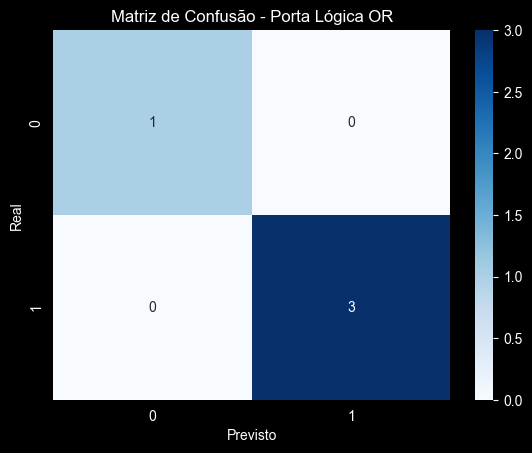

Pesos treinados: [0.14908024 0.30142861]
Bias treinado: -0.4360
Épocas para convergência: 12
--- Porta Lógica AND ---
Acurácia: 100.00%
Real:     [0 0 0 1]
Previsto: [0 0 0 1]
Matriz de Confusão:


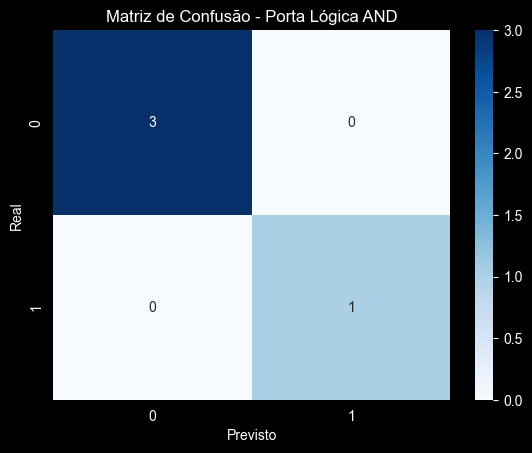

Pesos treinados: [-0.25091976  0.00142861]
Bias treinado: 0.0640
Épocas para convergência: 100
--- Porta Lógica XOR ---
Acurácia: 50.00%
Real:     [0 1 1 0]
Previsto: [1 1 0 0]
Matriz de Confusão:


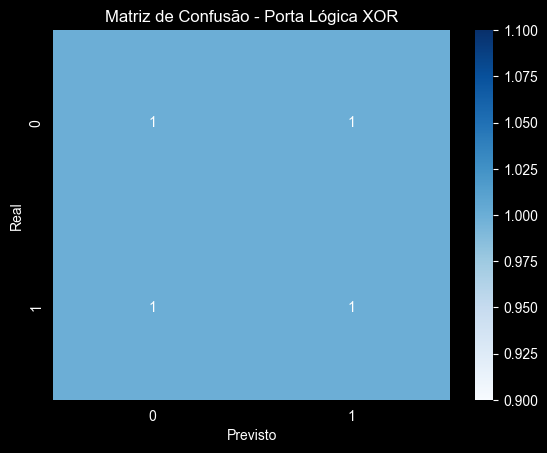

In [2]:
X_logicas = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

portas = {
    "OR": np.array([0, 1, 1, 1]),
    "AND": np.array([0, 0, 0, 1]),
    "XOR": np.array([0, 1, 1, 0])
}

for nome, y in portas.items():
    executar(X_logicas, y, f"Porta Lógica {nome}")


## 3. Dataset Iris - Classificação Setosa vs Outras espécies

Pesos treinados: [-0.58091976  0.37142861  0.86398788  0.37731697]
Bias treinado: -0.7880
Épocas para convergência: 4
--- Iris (4 Atributos) ---
Acurácia: 100.00%
Real:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Previsto: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Matriz de Confusão:


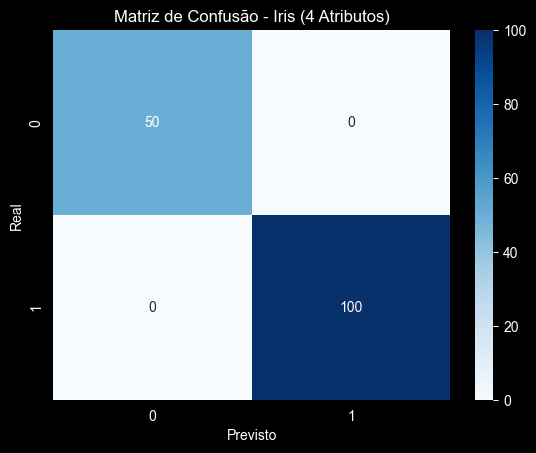

In [3]:
iris = load_iris()
X_iris = iris.data
y_iris = np.where(iris.target == 0, 0, 1)  # 0 = Setosa, 1 = outras

# Treino e avaliação com todas as features
executar(X_iris, y_iris, "Iris (4 Atributos)")


### Visualização 2D para Iris usando Sepal Length e Petal Length

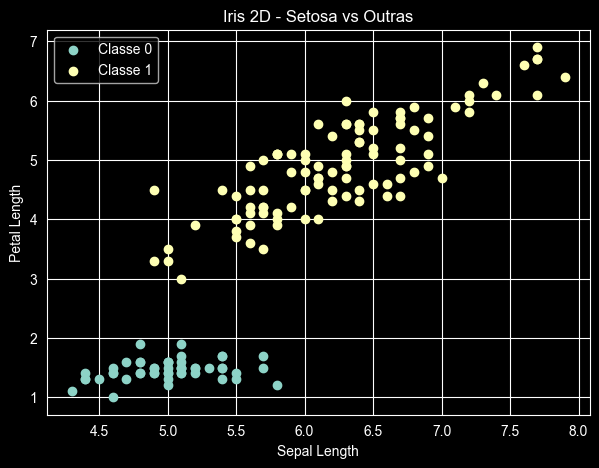

Pesos treinados: [-0.57091976  1.09142861]
Bias treinado: 0.3640
Épocas para convergência: 3
--- Iris (2 Atributos) ---
Acurácia: 100.00%
Real:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Previsto: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Matriz de Confusão:


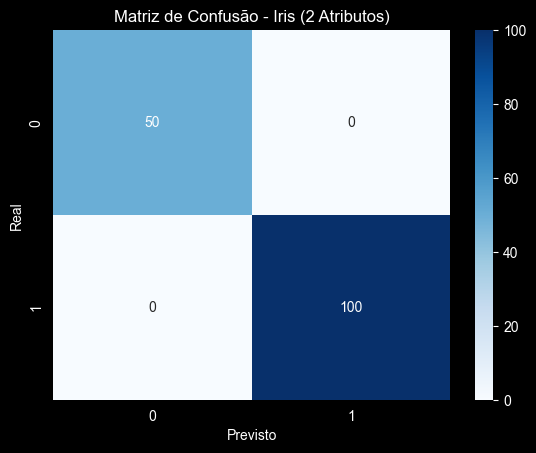

In [4]:
X_iris_2d = X_iris[:, [0, 2]]  # Sepal Length, Petal Length

def plot_dados_2d(X, y, titulo, labels=['Classe 0', 'Classe 1']):
    plt.figure(figsize=(7,5))
    for classe in np.unique(y):
        plt.scatter(X[y==classe, 0], X[y==classe, 1], label=labels[classe])
    plt.title(titulo)
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()
    plt.show()

plot_dados_2d(X_iris_2d, y_iris, "Iris 2D - Setosa vs Outras")

# Treino e avaliação usando apenas 2 features
executar(X_iris_2d, y_iris, "Iris (2 Atributos)")